In [1]:
import pandas as pd
from utils import group_experiment_by_amount
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_thresholds = pd.DataFrame(columns=['threshold', 'SD MAE (clipcount)', 'Ours MAE (clipcount)', 'SD MAE (YOLO)', 'Ours MAE (YOLO)', 'SD CLIP', 'Ours CLIP'])
thresholds = [0.2,0.3,0.4,0.5,0.6,0.7]

for threshold in thresholds:
    curr = pd.read_pickle(f"../experiments/dynamic_scale_factor/experiment_dynamic_scale_factor_thresh_{str(threshold).replace('.','')}.pkl")
    curr = curr[curr['is_clipcount'] == True]
    all_thresholds = pd.concat([all_thresholds, pd.DataFrame
    ([
        {
            "threshold" : threshold,
            'SD MAE (clipcount)' : curr['sd_count_diff'].mean(),
            'Ours MAE (clipcount)' : curr['sd_optimized_count_diff'].mean(),
            'SD MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_count_diff2'].mean(),
            'Ours MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_optimized_count_diff2'].mean(),
            'SD CLIP' : 1-curr['actual_relevance_score'].mean(),
            'Ours CLIP' : 1-curr['optimized_relevance_score'].mean()
        }
    ])], ignore_index=True)
    
all_thresholds

C:\Users\ozzafar\AppData\Local\Temp\ipykernel_5324\1893550129.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_thresholds = pd.concat([all_thresholds, pd.DataFrame


,threshold,SD MAE (clipcount),Ours MAE (clipcount),SD MAE (YOLO),Ours MAE (YOLO),SD CLIP,Ours CLIP
0,0.2,20.689931,18.495025,15.177778,10.155556,0.702454,0.702083
1,0.3,21.103234,15.382917,15.177778,6.977778,0.702347,0.702029
2,0.4,21.103234,17.688358,15.177778,9.066667,0.702347,0.702307
3,0.5,21.103234,17.737352,15.177778,8.400000,0.702347,0.702020
4,0.6,21.103234,24.386173,15.177778,11.733333,0.702347,0.705907
5,0.7,21.103234,25.280816,15.177778,13.555556,0.702347,0.700811


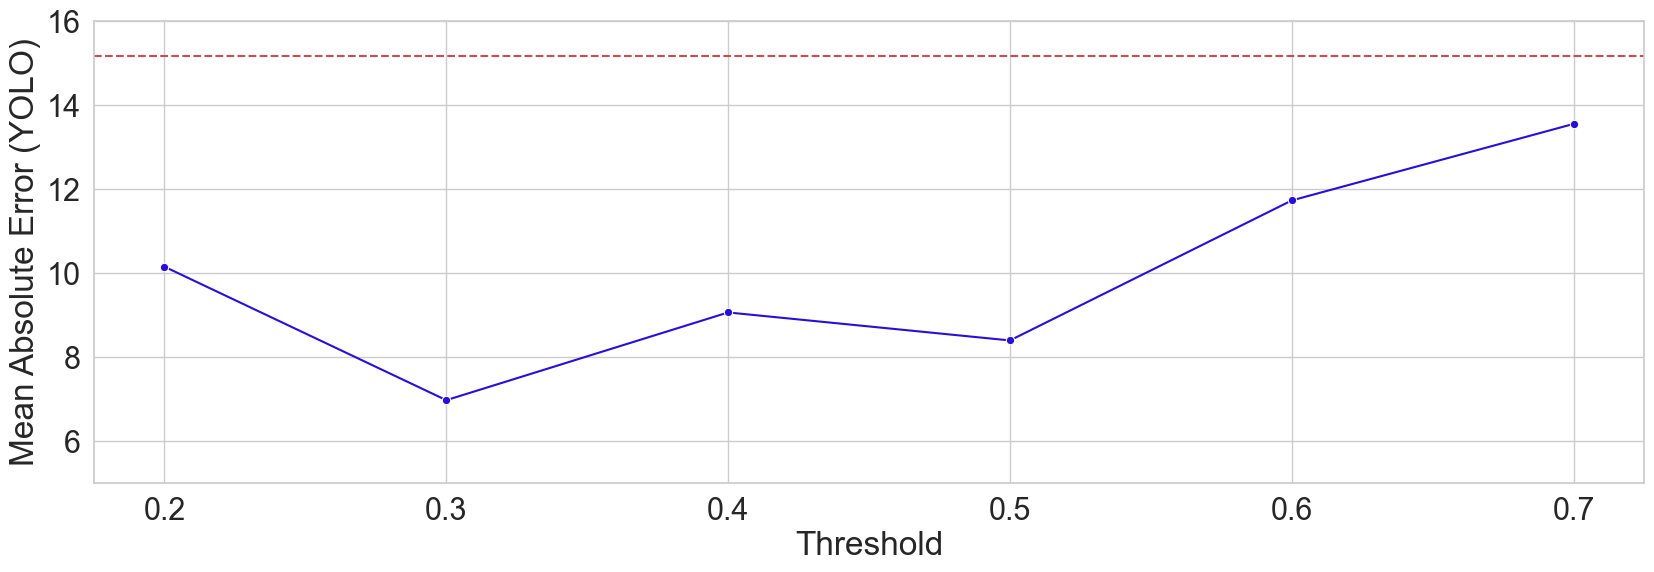

In [9]:
ours_maes = []
sd_mae = None

for i, _lambda in enumerate(thresholds):
    df = all_thresholds.loc[i]
    ours_maes.append(df['Ours MAE (YOLO)'].mean())
    sd_mae = df['SD MAE (YOLO)'].mean()

plt.figure(figsize=(20, 6))
plt.xlabel('Threshold')
plt.ylabel('Mean Absolute Error (YOLO)')
# plt.title('Threshold vs MAE')
sns.set(style="whitegrid", font_scale=2)

# Create a scatter plot
sns_plot = sns.lineplot(x=thresholds, y=ours_maes, marker='o', linestyle='-', color='#270fd9')
# sns_plot.set_xscale('log')
sns_plot.set_ylim(5, 16)

plt.axhline(y=sd_mae, color='r', linestyle='--')

# Show the plot
plt.savefig('../figures/thresh_vs_mae.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
best_threshold_index = all_thresholds["Ours MAE (YOLO)"].idxmin()
best_threshold = thresholds[best_threshold_index]
best_threshold

0.3

In [5]:
best_threshold_df = pd.read_pickle(f"../experiments/dynamic_scale_factor/experiment_dynamic_scale_factor_thresh_{str(best_threshold).replace('.','')}.pkl")
best_threshold_df = best_threshold_df[best_threshold_df['is_clipcount'] == True]
group_experiment_by_amount(best_threshold_df)

,amount,SD MAE (clipcount),Ours MAE (clipcount),SD MAE (YOLO),Ours MAE (YOLO),SD CLIP,Ours CLIP
0,5,4.906011,16.057946,4.6,2.133333,0.696720,0.698600
1,15,23.152459,10.843731,18.733333,8.333333,0.703467,0.702160
2,25,35.251232,19.247074,22.2,10.466667,0.706853,0.705327


In [6]:
df = pd.DataFrame(columns=['SD MAE (clipcount)', 'Ours MAE (clipcount)', 'SD MAE (YOLO)', 'Ours MAE (YOLO)', 'SD CLIP', 'Ours CLIP'])
experiment_names = [
    "experiment_dynamic_scale_factor_thresh_03",
    "experiment_dynamic_scale_factor_thresh_03_lambda_0_lr_01_no_forward",
    "experiment_dynamic_scale_factor_thresh_03_lambda_5_lr_01",
    "experiment_dynamic_scale_factor_thresh_03_lambda_5_lr_01_no_forward"
]

for experiment_name in experiment_names:
    curr = pd.read_pickle(f"../experiments/dynamic_scale_factor/{experiment_name}.pkl")
    curr = curr[curr['is_clipcount'] == True]
    df = pd.concat([df, pd.DataFrame
    ([
        {
            "name" : experiment_name,
            'SD MAE (clipcount)' : curr['sd_count_diff'].mean(),
            'Ours MAE (clipcount)' : curr['sd_optimized_count_diff'].mean(),
            'SD MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_count_diff2'].mean(),
            'Ours MAE (YOLO)' : curr[curr['is_yolo'] == True]['sd_optimized_count_diff2'].mean(),
            'SD CLIP' : 1-curr['actual_relevance_score'].mean(),
            'Ours CLIP' : 1-curr['optimized_relevance_score'].mean()
        }
    ])], ignore_index=True)
    
df

C:\Users\ozzafar\AppData\Local\Temp\ipykernel_5324\3435746483.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame


,SD MAE (clipcount),Ours MAE (clipcount),SD MAE (YOLO),Ours MAE (YOLO),SD CLIP,Ours CLIP,name
0,21.103234,15.382917,15.177778,6.977778,0.702347,0.702029,experiment_dynamic_scale_factor_thresh_03
1,21.103234,17.292042,15.177778,7.688889,0.702347,0.699616,experiment_dynamic_scale_factor_thresh_03_lamb...
2,21.103234,16.314123,15.177778,9.577778,0.702347,0.699476,experiment_dynamic_scale_factor_thresh_03_lamb...
3,21.103234,15.036501,15.177778,8.177778,0.702347,0.699358,experiment_dynamic_scale_factor_thresh_03_lamb...


Insights:
1. setting yolo threshold 0.3 has most Quantitative results, though 0.5 has best Qualitative results (dynamic_scale_factor_thresh_05)
2. integrating clip doesn't help
3. remove forward isn't consistent